In [66]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/MyDrive/Colab Notebooks/zadanie 1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

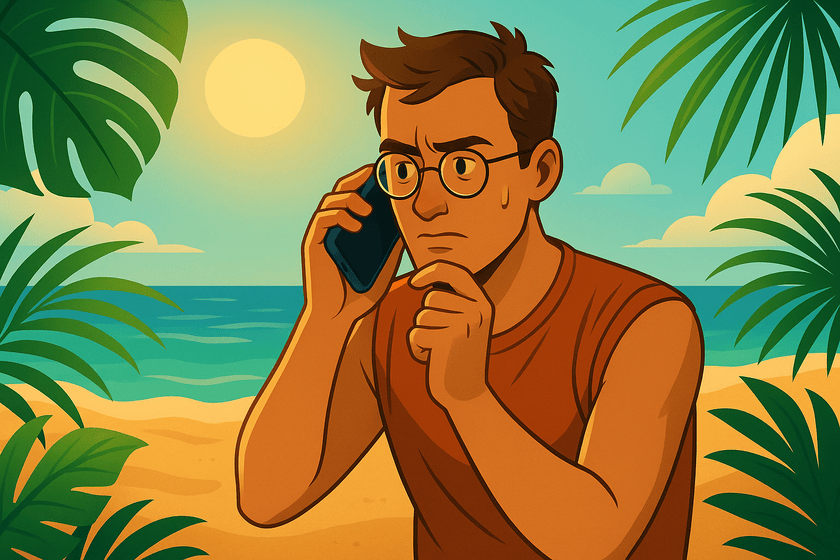

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [68]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

Plan działania


1. Poznanie danych
*   Wykrycie braków danych i uzupełnienie/obsługa.
*   Sprawdzenie anomalii (np. nietypowe wartości wieku, ceny biletu).
2. Analiza zmiennej docelowej (Survived)
*   Sprawdzenie ile osób przeżyło, a ile nie.
*   Prosta wizualizacja (wykres słupkowy).
3. Analiza cech demograficznych
*   Zależność płci od przeżycia.
*   Zależność wieku od przeżycia.
*  Liczba członków rodziny na pokładzie vs przeżycie.
4. Analiza cech związanych z podróżą
*   Klasa biletu (Pclass) vs przeżycie.
*   Port zaokrętowania (Embarked) vs przeżycie.
*   Cena biletu (Fare) vs przeżycie.
*   Zakwaterowanie (Cabin) vs przeżycie.
5. Analiza korelacji
*   Korelacje między zmiennymi liczbowymi.
*   Wizualizacja macierzy korelacji.
6. Wnioski końcowe
*   Podsumowanie, które czynniki wydają się mieć największy wpływ na przeżycie.

In [69]:
print("Liczba braków danych w każdej kolumnie:")
print(titanic_df.isna().sum())

Liczba braków danych w każdej kolumnie:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64



--- Wykresy pudełkowe do wizualizacji wartości odstających ---


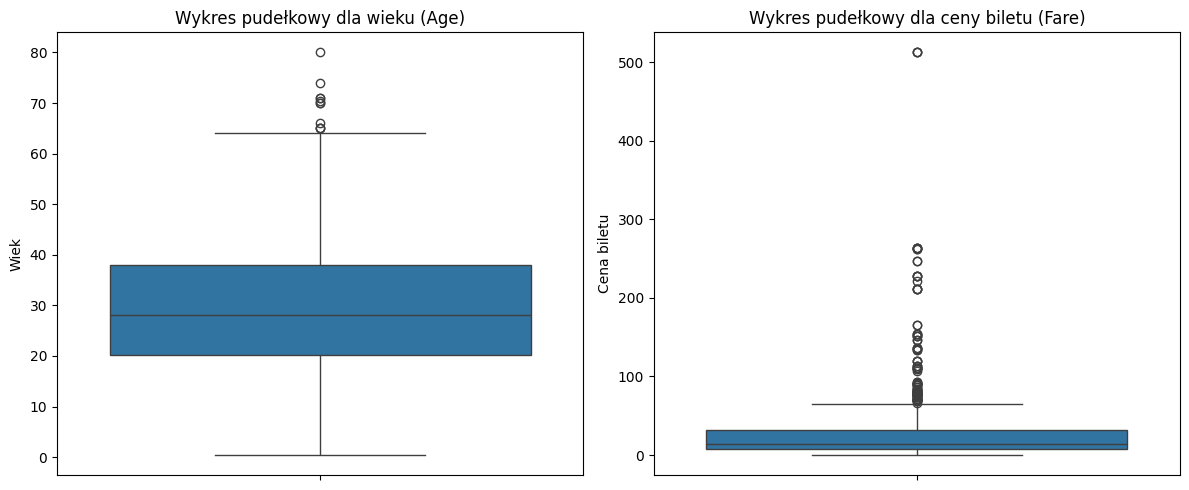

Kropki na wykresach pudełkowych reprezentują potencjalne wartości odstające.

--- Wykrywanie wartości odstających za pomocą reguły IQR (Age) ---
Pierwszy kwartyl (Q1) dla wieku: 20.125
Trzeci kwartyl (Q3) dla wieku: 38.0
Rozstęp ćwiartkowy (IQR) dla wieku: 17.875
Dolna granica (lower bound): -6.6875
Górna granica (upper bound): 64.8125
Liczba wartości odstających w kolumnie 'Age': 11
Przykładowe wartości odstające dla wieku:
              Age  Survived  Pclass
PassengerId                        
34           66.0         0       2
55           65.0         0       1
97           71.0         0       1
117          70.5         0       3
281          65.0         0       3

--- Wykrywanie wartości odstających za pomocą reguły IQR (Fare) ---
Pierwszy kwartyl (Q1) dla ceny biletu: 7.925
Trzeci kwartyl (Q3) dla ceny biletu: 31.275
Rozstęp ćwiartkowy (IQR) dla ceny biletu: 23.349999999999998
Dolna granica (lower bound): -27.099999999999998
Górna granica (upper bound): 66.3
Liczba wartości o

In [70]:
print("\n--- Wykresy pudełkowe do wizualizacji wartości odstających ---")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=titanic_df['Age'])
plt.title('Wykres pudełkowy dla wieku (Age)')
plt.ylabel('Wiek')

plt.subplot(1, 2, 2)
sns.boxplot(y=titanic_df['Fare'])
plt.title('Wykres pudełkowy dla ceny biletu (Fare)')
plt.ylabel('Cena biletu')

plt.tight_layout()
plt.show()

print("Kropki na wykresach pudełkowych reprezentują potencjalne wartości odstające.")


# --- Wykrywanie wartości odstających za pomocą reguły IQR ---
print("\n--- Wykrywanie wartości odstających za pomocą reguły IQR (Age) ---")
Q1_age = titanic_df['Age'].quantile(0.25)
Q3_age = titanic_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = titanic_df[(titanic_df['Age'] < lower_bound_age) | (titanic_df['Age'] > upper_bound_age)]

print(f"Pierwszy kwartyl (Q1) dla wieku: {Q1_age}")
print(f"Trzeci kwartyl (Q3) dla wieku: {Q3_age}")
print(f"Rozstęp ćwiartkowy (IQR) dla wieku: {IQR_age}")
print(f"Dolna granica (lower bound): {lower_bound_age}")
print(f"Górna granica (upper bound): {upper_bound_age}")
print(f"Liczba wartości odstających w kolumnie 'Age': {len(outliers_age)}")
print("Przykładowe wartości odstające dla wieku:")
print(outliers_age[['Age', 'Survived', 'Pclass']].head())


print("\n--- Wykrywanie wartości odstających za pomocą reguły IQR (Fare) ---")
Q1_fare = titanic_df['Fare'].quantile(0.25)
Q3_fare = titanic_df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

outliers_fare = titanic_df[(titanic_df['Fare'] < lower_bound_fare) | (titanic_df['Fare'] > upper_bound_fare)]

print(f"Pierwszy kwartyl (Q1) dla ceny biletu: {Q1_fare}")
print(f"Trzeci kwartyl (Q3) dla ceny biletu: {Q3_fare}")
print(f"Rozstęp ćwiartkowy (IQR) dla ceny biletu: {IQR_fare}")
print(f"Dolna granica (lower bound): {lower_bound_fare}")
print(f"Górna granica (upper bound): {upper_bound_fare}")
print(f"Liczba wartości odstających w kolumnie 'Fare': {len(outliers_fare)}")
print("Przykładowe wartości odstające dla ceny biletu:")
print(outliers_fare[['Fare', 'Survived', 'Pclass']].head())

Wiek (Age): Wartości odstające dla wieku to osoby starsze, powyżej 64.81 lat. W tym przykładzie są to pasażerowie w wieku 65, 66 i 71 lat. W kontekście katastrofy Titanica, bardzo starsi pasażerowie mogą mieć mniejsze szanse przeżyci.

Cena biletu (Fare): Wartości odstające to bilety droższe niż 66.3 jednostki. Biorąc pod uwagę, że te bilety najczęściej należały do pasażerów z 1. klasy, mogli mieć większe szanse na przeżycie.

Tworzenie kopii danych zawierajacej uzupełnione puste rekordy

In [79]:
# Tworzenie kopii DataFrame, aby nie modyfikować oryginalnego
titanic_df_filled = titanic_df.copy()

# Uzupełnianie brakujących wartości w 'Age' medianą
median_age = titanic_df_filled['Age'].median()
titanic_df_filled['Age'] = titanic_df_filled['Age'].fillna(median_age)
print(f"\nUzupełniono brakujące wartości w kolumnie 'Age' medianą: {median_age}")

# Uzupełnianie brakujących wartości w 'Fare' medianą
median_fare = titanic_df_filled['Fare'].median()
titanic_df_filled['Fare'] = titanic_df_filled['Fare'].fillna(median_fare)
print(f"Uzupełniono brakujące wartości w kolumnie 'Fare' medianą: {median_fare}")

# Uzupełnianie brakujących wartości w 'Embarked' modą (najczęściej występującą wartością)
mode_embarked = titanic_df_filled['Embarked'].mode()[0]
titanic_df_filled['Embarked'] = titanic_df_filled['Embarked'].fillna(mode_embarked)
print(f"Uzupełniono brakujące wartości w kolumnie 'Embarked' modą: {mode_embarked}")

# Sprawdzenie, czy po uzupełnieniu braków nie ma już brakujących wartości
print("\nLiczba braków danych w każdej kolumnie po uzupełnieniu:")
print(titanic_df_filled.isna().sum())


Uzupełniono brakujące wartości w kolumnie 'Age' medianą: 28.0
Uzupełniono brakujące wartości w kolumnie 'Fare' medianą: 14.5
Uzupełniono brakujące wartości w kolumnie 'Embarked' modą: S

Liczba braków danych w każdej kolumnie po uzupełnieniu:
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
Age_Group     178
FamilySize      0
dtype: int64


Analiza zmiennej docelowej

Rozkład zmiennej Survived (liczności):
Survived
0    549
1    342
Name: count, dtype: int64

Rozkład zmiennej Survived (procenty):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


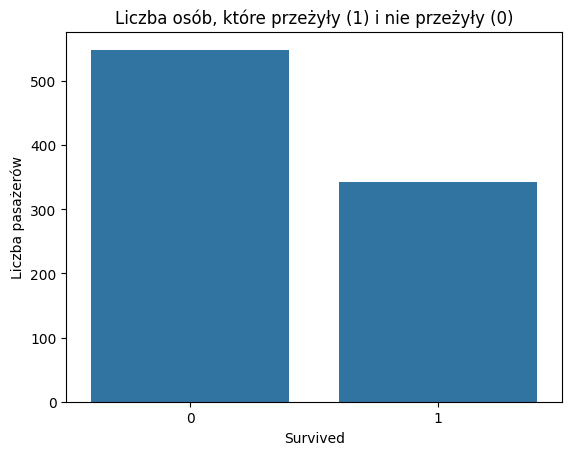

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rozkład zmiennej Survived
print("Rozkład zmiennej Survived (liczności):")
print(titanic_df['Survived'].value_counts())

print("\nRozkład zmiennej Survived (procenty):")
print(titanic_df['Survived'].value_counts(normalize=True) * 100)

sns.countplot(data=titanic_df, x='Survived')
plt.title("Liczba osób, które przeżyły (1) i nie przeżyły (0)")
plt.xlabel("Survived")
plt.ylabel("Liczba pasażerów")
plt.show()


Analiza cech demograficznych (płeć, wiek i członkowie rodziny na pokładzie)

Liczności dla płci i przeżycia:
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

Procentowy rozkład przeżycia według płci:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


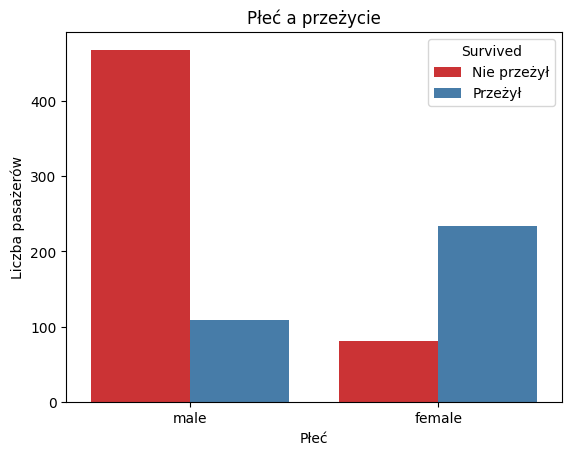

In [73]:
# Analiza zależności płeć vs przeżycie
print("Liczności dla płci i przeżycia:")
print(titanic_df.groupby(['Sex', 'Survived']).size())

print("\nProcentowy rozkład przeżycia według płci:")
print(titanic_df.groupby('Sex')['Survived'].mean() * 100)

sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette='Set1')
plt.title("Płeć a przeżycie")
plt.xlabel("Płeć")
plt.ylabel("Liczba pasażerów")
plt.legend(title="Survived", labels=["Nie przeżył", "Przeżył"])
plt.show()

Dane pokazują bardzo wyraźną różnicę między płciami w szansach na przeżycie.
Około 74% kobiet przeżyło katastrofę, podczas gdy wśród mężczyzn odsetek ten wynosił zaledwie 19%.
Wskazuje to, że zasada "kobiety i dzieci najpierw" miała realne odzwierciedlenie w procesie ewakuacji.


Wiek vs przeżycie


--- Analiza zależności wieku vs przeżycie ---


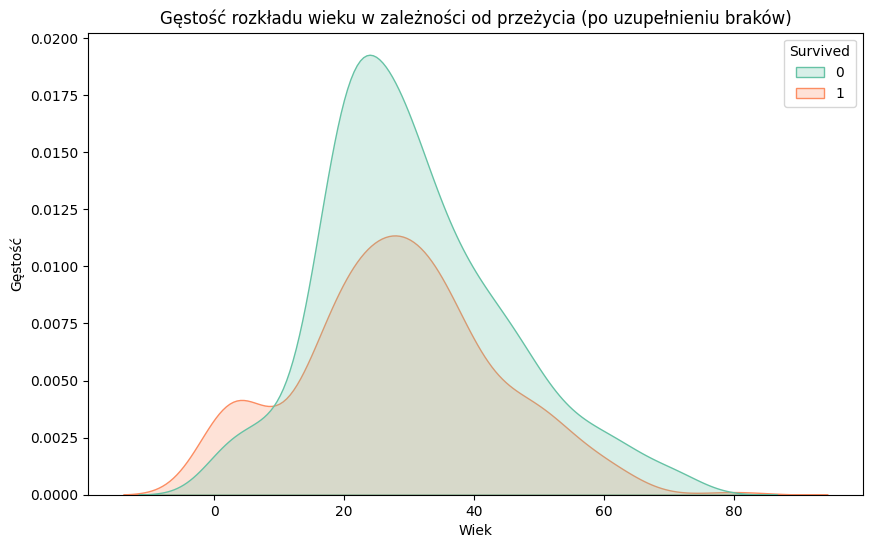


Procentowy rozkład przeżycia według grup wiekowych:
Age_Group
0-15     57.692308
16-30    36.274510
31-45    42.325581
46-60    40.449438
61-80    24.000000
Name: Survived, dtype: float64


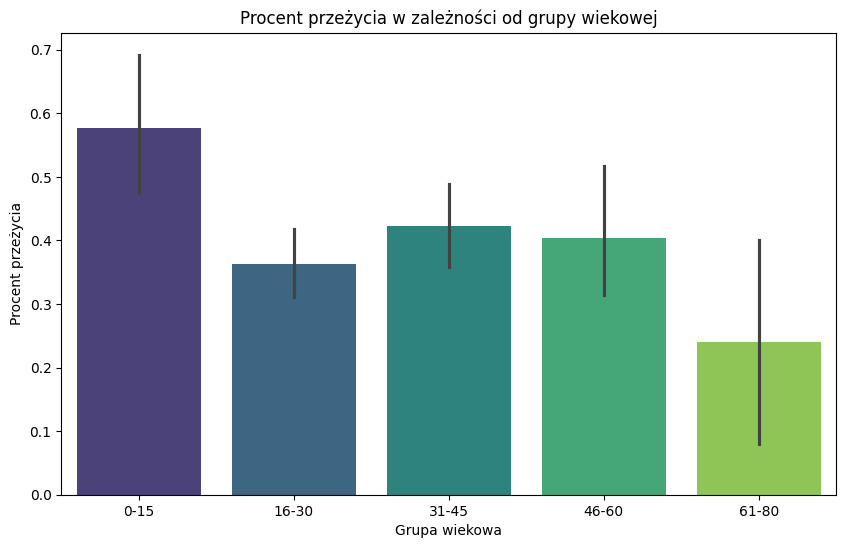

In [74]:
# --- Analiza zależności wieku vs przeżycie na uzupełnionych danych ---
print("\n--- Analiza zależności wieku vs przeżycie ---")

# Wizualizacja gęstości rozkładu wieku
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_df, x='Age', hue='Survived', fill=True, palette='Set2')
plt.title('Gęstość rozkładu wieku w zależności od przeżycia (po uzupełnieniu braków)')
plt.xlabel('Wiek')
plt.ylabel('Gęstość')
plt.show()

# Podział wieku na grupy i analiza przeżycia
bins = [0, 15, 30, 45, 60, 80]
labels = ['0-15', '16-30', '31-45', '46-60', '61-80']
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)

print("\nProcentowy rozkład przeżycia według grup wiekowych:")
print(titanic_df.groupby('Age_Group', observed=False)['Survived'].mean() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Survived', data=titanic_df, hue='Age_Group', palette='viridis', legend=False)
plt.title("Procent przeżycia w zależności od grupy wiekowej")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Procent przeżycia")
plt.show()

Z danych wynika, że dzieci (grupa 0-15 lat) miały największe szanse na przeżycie (57.7%), co sugeruje priorytet w ratowaniu najmłodszych. Najniższy odsetek przeżycia odnotowano w najstarszej grupie wiekowej (61-80 lat), wynoszący 24.0%. W pozostałych grupach wiekowych (16-30, 31-45, 46-60) szanse na przeżycie były zbliżone, w granicach 33.7% do 42.3%.

Dodatkowo została przeprowadzona analiza danych z wypełnionymi pustymi danymi poprzez mediane


--- Analiza zależności wieku vs przeżycie ---


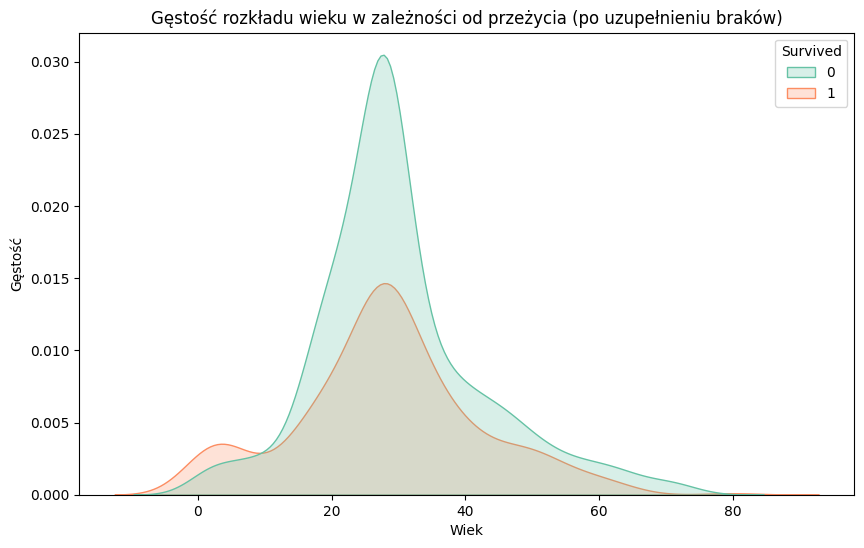


Procentowy rozkład przeżycia według grup wiekowych:
Age_Group
0-15     57.692308
16-30    33.747412
31-45    42.325581
46-60    40.449438
61-80    24.000000
Name: Survived, dtype: float64


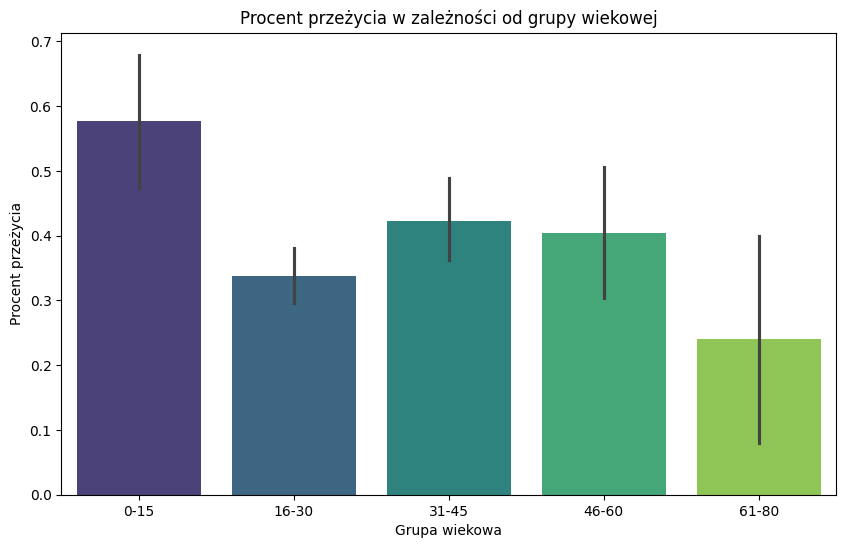

In [80]:
# --- Analiza zależności wieku vs przeżycie na uzupełnionych danych ---
print("\n--- Analiza zależności wieku vs przeżycie ---")

# Wizualizacja gęstości rozkładu wieku
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_df_filled, x='Age', hue='Survived', fill=True, palette='Set2')
plt.title('Gęstość rozkładu wieku w zależności od przeżycia (po uzupełnieniu braków)')
plt.xlabel('Wiek')
plt.ylabel('Gęstość')
plt.show()

# Podział wieku na grupy i analiza przeżycia
bins = [0, 15, 30, 45, 60, 80]
labels = ['0-15', '16-30', '31-45', '46-60', '61-80']
titanic_df_filled['Age_Group'] = pd.cut(titanic_df_filled['Age'], bins=bins, labels=labels, right=False)

print("\nProcentowy rozkład przeżycia według grup wiekowych:")
print(titanic_df_filled.groupby('Age_Group', observed=False)['Survived'].mean() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Survived', data=titanic_df_filled, hue='Age_Group', palette='viridis', legend=False)
plt.title("Procent przeżycia w zależności od grupy wiekowej")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Procent przeżycia")
plt.show()

--- Porównanie rozkładu wieku przed i po uzupełnieniu braków ---


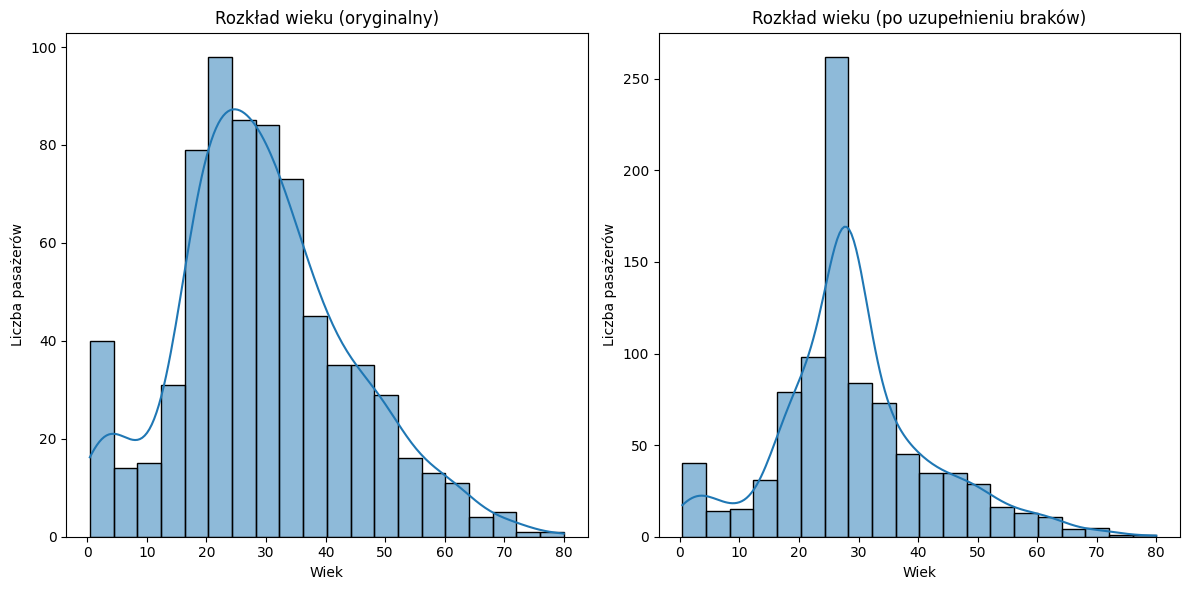


--- Porównanie procentowego rozkładu przeżycia według grup wiekowych ---

Procentowy rozkład przeżycia według grup wiekowych (oryginalny):
Age_Group
0-15     57.692308
16-30    36.274510
31-45    42.325581
46-60    40.449438
61-80    24.000000
Name: Survived, dtype: float64

Procentowy rozkład przeżycia według grup wiekowych (po uzupełnieniu braków):
Age_Group
0-15     57.692308
16-30    33.747412
31-45    42.325581
46-60    40.449438
61-80    24.000000
Name: Survived, dtype: float64


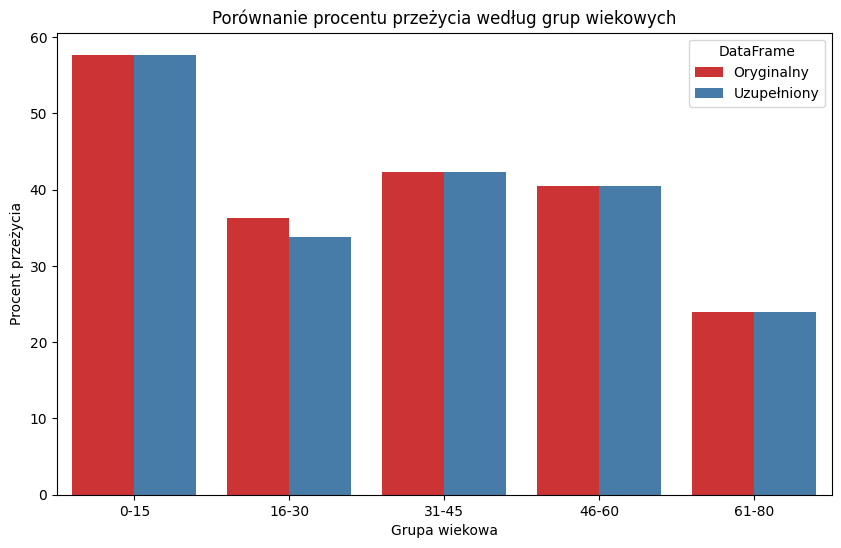

In [82]:
# --- Porównanie rozkładu wieku przed i po uzupełnieniu braków ---
print("--- Porównanie rozkładu wieku przed i po uzupełnieniu braków ---")

plt.figure(figsize=(12, 6))

# Rozkład wieku w oryginalnym DataFrame
plt.subplot(1, 2, 1)
sns.histplot(data=titanic_df, x='Age', bins=20, kde=True)
plt.title('Rozkład wieku (oryginalny)')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# Rozkład wieku w DataFrame z uzupełnionymi brakami
plt.subplot(1, 2, 2)
sns.histplot(data=titanic_df_filled, x='Age', bins=20, kde=True)
plt.title('Rozkład wieku (po uzupełnieniu braków)')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

plt.tight_layout()
plt.show()

# --- Porównanie procentowego rozkładu przeżycia według grup wiekowych ---
print("\n--- Porównanie procentowego rozkładu przeżycia według grup wiekowych ---")

# Podział wieku na grupy i analiza przeżycia dla oryginalnego DataFrame
bins = [0, 15, 30, 45, 60, 80]
labels = ['0-15', '16-30', '31-45', '46-60', '61-80']
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)
survival_rate_original = titanic_df.groupby('Age_Group', observed=False)['Survived'].mean() * 100
print("\nProcentowy rozkład przeżycia według grup wiekowych (oryginalny):")
print(survival_rate_original)

# Podział wieku na grupy i analiza przeżycia dla DataFrame z uzupełnionymi brakami
titanic_df_filled['Age_Group'] = pd.cut(titanic_df_filled['Age'], bins=bins, labels=labels, right=False)
survival_rate_filled = titanic_df_filled.groupby('Age_Group', observed=False)['Survived'].mean() * 100
print("\nProcentowy rozkład przeżycia według grup wiekowych (po uzupełnieniu braków):")
print(survival_rate_filled)

# Wizualizacja porównania procentu przeżycia
survival_comparison = pd.DataFrame({
    'Oryginalny': survival_rate_original,
    'Uzupełniony': survival_rate_filled
}).reset_index()

plt.figure(figsize=(10, 6))
melted_comparison = survival_comparison.melt('Age_Group', var_name='DataFrame', value_name='Procent przeżycia')
sns.barplot(x='Age_Group', y='Procent przeżycia', hue='DataFrame', data=melted_comparison, palette='Set1')
plt.title("Porównanie procentu przeżycia według grup wiekowych")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Procent przeżycia")
plt.show()

Ilość czlonków rodziny na pokładzie


Liczności dla liczby członków rodziny i przeżycia:
FamilySize  Survived
1           0           374
            1           163
2           0            72
            1            89
3           0            43
            1            59
4           0             8
            1            21
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
dtype: int64

Procentowy rozkład przeżycia według liczby członków rodziny:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


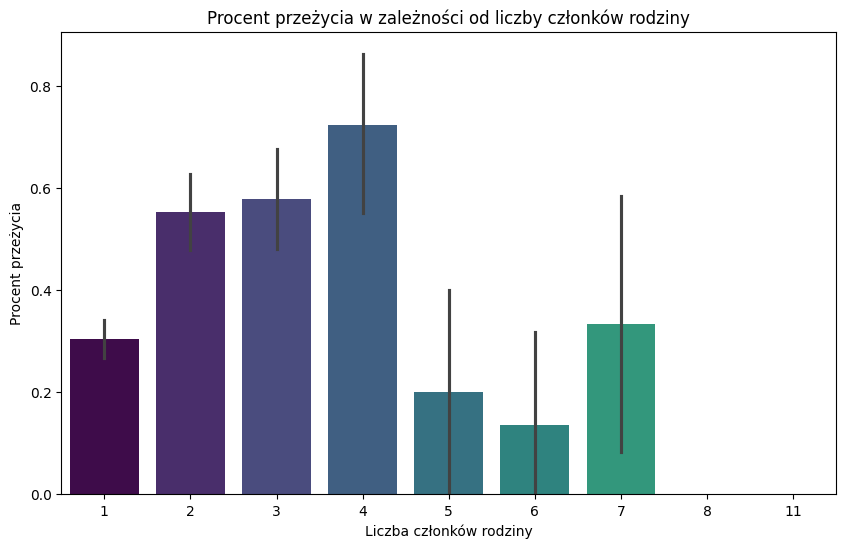

In [75]:
# Stworzenie nowej kolumny 'FamilySize' łączącej SibSp i Parch
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the passenger themselves

# Analiza zależności FamilySize vs przeżycie
print("\nLiczności dla liczby członków rodziny i przeżycia:")
print(titanic_df.groupby(['FamilySize', 'Survived']).size())

print("\nProcentowy rozkład przeżycia według liczby członków rodziny:")
print(titanic_df.groupby('FamilySize')['Survived'].mean() * 100)

# Wizualizacja zależności FamilySize vs przeżycie
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df, hue='FamilySize', palette='viridis', legend=False)
plt.title("Procent przeżycia w zależności od liczby członków rodziny")
plt.xlabel("Liczba członków rodziny")
plt.ylabel("Procent przeżycia")
plt.show()

Analiza liczby członków rodziny na pokładzie wskazuje, że osoby podróżujące w małych grupach rodzinnych (2-4 osoby) miały znacznie wyższe szanse na przeżycie (powyżej 55%) w porównaniu do osób podróżujących samotnie (ok. 30.4% przeżycia). Natomiast pasażerowie w bardzo dużych rodzinach (5 i więcej osób) mieli drastycznie niższe szanse na przeżycie, z odsetkiem przeżycia spadającym do zera dla rodzin 8- i 11-osobowych. Sugeruje to, że podróżowanie z kilkoma członkami rodziny mogło zwiększyć szanse na wzajemną pomoc i odnalezienie drogi do szalup, podczas gdy bardzo liczne rodziny mogły napotkać większe trudności w szybkiej ewakuacji.

## Analiza cech związanych z podróżą (klasa biletu, port zaokrętowania)

Liczności dla klasy biletu i przeżycia:
Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

Procentowy rozkład przeżycia według klasy biletu:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


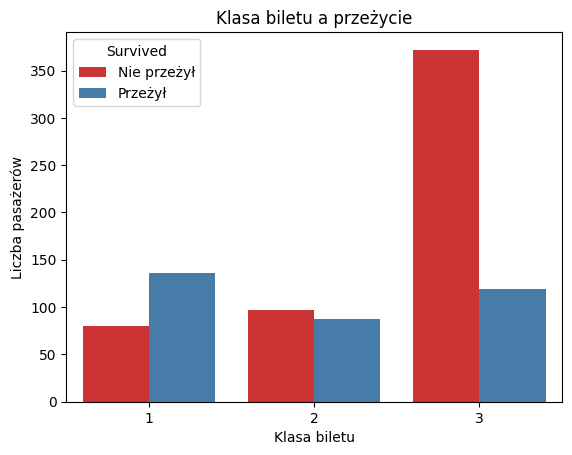

In [76]:
# Analiza zależności Pclass vs przeżycie
print("Liczności dla klasy biletu i przeżycia:")
print(titanic_df.groupby(['Pclass', 'Survived']).size())

print("\nProcentowy rozkład przeżycia według klasy biletu:")
print(titanic_df.groupby('Pclass')['Survived'].mean() * 100)

sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='Set1')
plt.title("Klasa biletu a przeżycie")
plt.xlabel("Klasa biletu")
plt.ylabel("Liczba pasażerów")
plt.legend(title="Survived", labels=["Nie przeżył", "Przeżył"])
plt.show()

Można wnioskować, że dostęp do szalup ratunkowych był priorytetem dla pasażerów z wyższych klas, co jest kluczowym czynnikiem wpływającym na ostateczne statystyki przeżycia.

## Analiza portu zaokrętowania (Embarked) vs przeżycie


Liczności dla portu zaokrętowania i przeżycia:
Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

Procentowy rozkład przeżycia według portu zaokrętowania:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


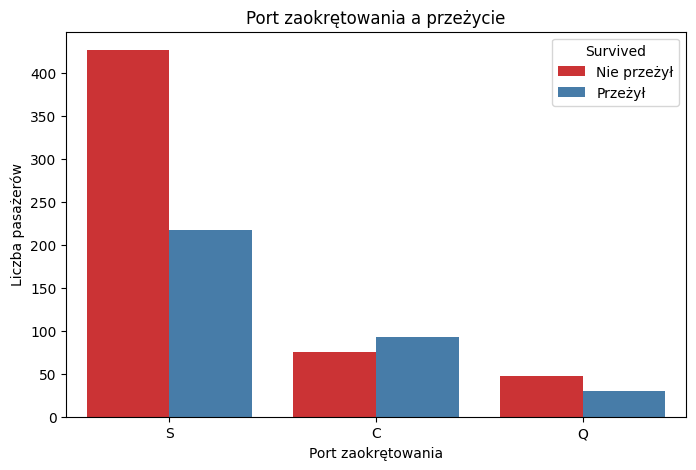

In [77]:
# Analiza zależności Embarked vs przeżycie
print("\nLiczności dla portu zaokrętowania i przeżycia:")
print(titanic_df.groupby(['Embarked', 'Survived']).size())

print("\nProcentowy rozkład przeżycia według portu zaokrętowania:")
print(titanic_df.groupby('Embarked')['Survived'].mean() * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='Embarked', hue='Survived', palette='Set1')
plt.title("Port zaokrętowania a przeżycie")
plt.xlabel("Port zaokrętowania")
plt.ylabel("Liczba pasażerów")
plt.legend(title="Survived", labels=["Nie przeżył", "Przeżył"])
plt.show()

Analiza portu zaokrętowania (Embarked) wskazuje na znaczące różnice w odsetku przeżycia w zależności od miejsca wsiadania na statek. Pasażerowie, którzy zaokrętowali się w Cherbourgu (C), mieli najwyższe szanse na przeżycie (około 55.4%), podczas gdy osoby z Queenstown (Q) miały nieco niższy odsetek (około 39.0%), a pasażerowie z Southampton (S) najniższy (około 33.7%). Może to być związane z różnicami w klasie podróży pasażerów wsiadających w poszczególnych portach, a co za tym idzie, z dostępem do szalup ratunkowych.


--- Analiza zależności ceny biletu (Fare) vs przeżycie ---


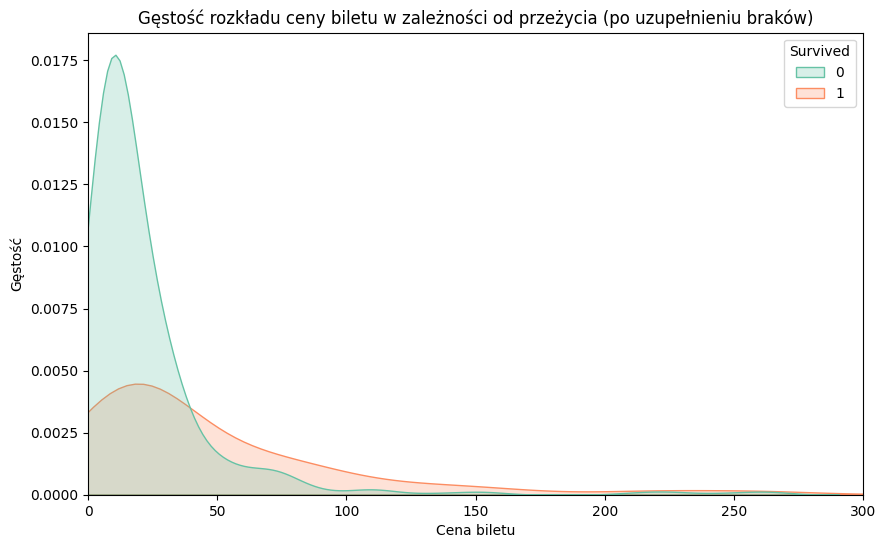


Procentowy rozkład przeżycia według grup cenowych biletu:
Fare_Group
Q1    20.408163
Q2    29.797980
Q3    44.162437
Q4    60.396040
Name: Survived, dtype: float64


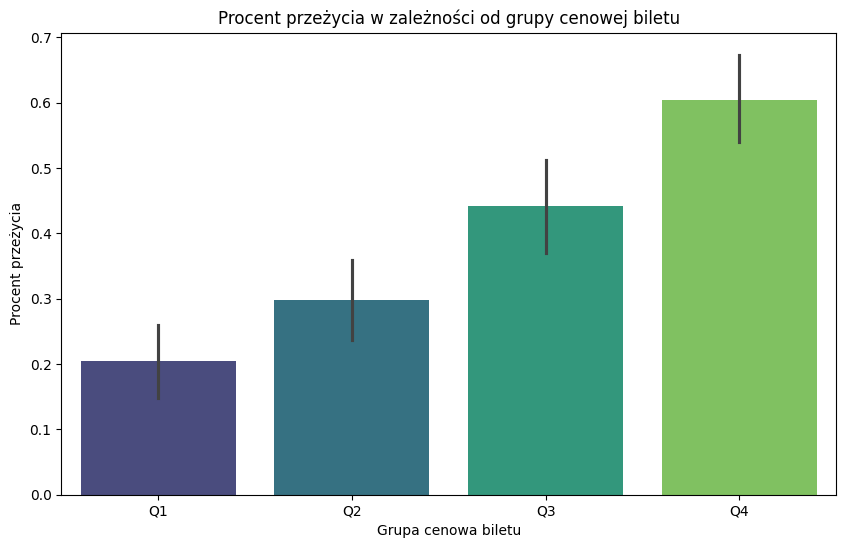

In [85]:
# --- Analiza zależności ceny biletu (Fare) vs przeżycie na uzupełnionych danych ---
print("\n--- Analiza zależności ceny biletu (Fare) vs przeżycie ---")

# Wizualizacja gęstości rozkładu ceny biletu
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_df, x='Fare', hue='Survived', fill=True, palette='Set2')
plt.title('Gęstość rozkładu ceny biletu w zależności od przeżycia (przed uzupełnieniu braków)')
plt.xlabel('Cena biletu')
plt.ylabel('Gęstość')
plt.xlim(0, 300)
plt.show()

# Podział ceny biletu na grupy i analiza przeżycia
# Użyjemy kwartyli do podziału na grupy, aby uwzględnić rozkład danych
fare_bins = titanic_df['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
# Dodajemy 0.01 do górnej granicy, aby uwzględnić wartości równe kwartylowi
fare_bins[-1] += 0.01
fare_labels = ['Q1', 'Q2', 'Q3', 'Q4']
titanic_df['Fare_Group'] = pd.cut(titanic_df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True, right=False)


print("\nProcentowy rozkład przeżycia według grup cenowych biletu:")
print(titanic_df.groupby('Fare_Group', observed=False)['Survived'].mean() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(x='Fare_Group', y='Survived', data=titanic_df, hue='Fare_Group', palette='viridis', legend=False)
plt.title("Procent przeżycia w zależności od grupy cenowej biletu")
plt.xlabel("Grupa cenowa biletu")
plt.ylabel("Procent przeżycia")
plt.show()


--- Analiza zależności ceny biletu (Fare) vs przeżycie ---


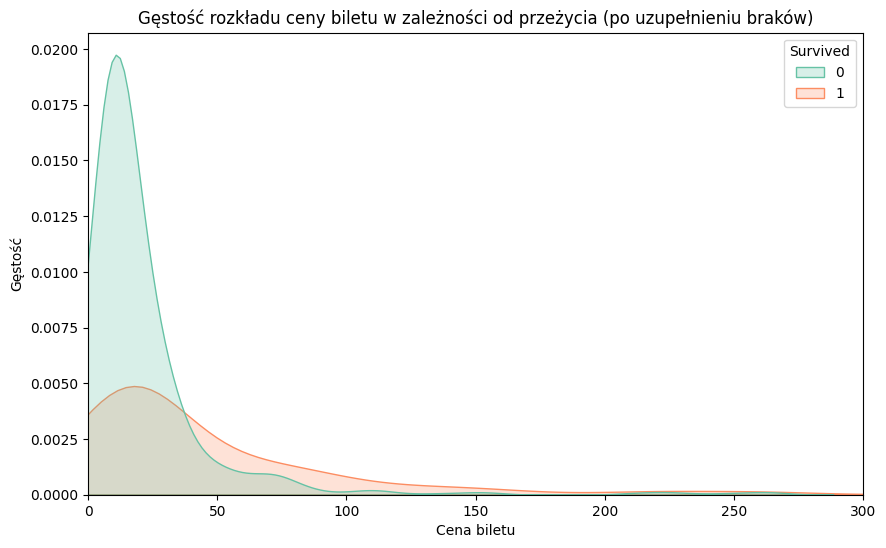


Procentowy rozkład przeżycia według grup cenowych biletu:
Fare_Group
Q1    22.641509
Q2    28.021978
Q3    39.852399
Q4    59.734513
Name: Survived, dtype: float64


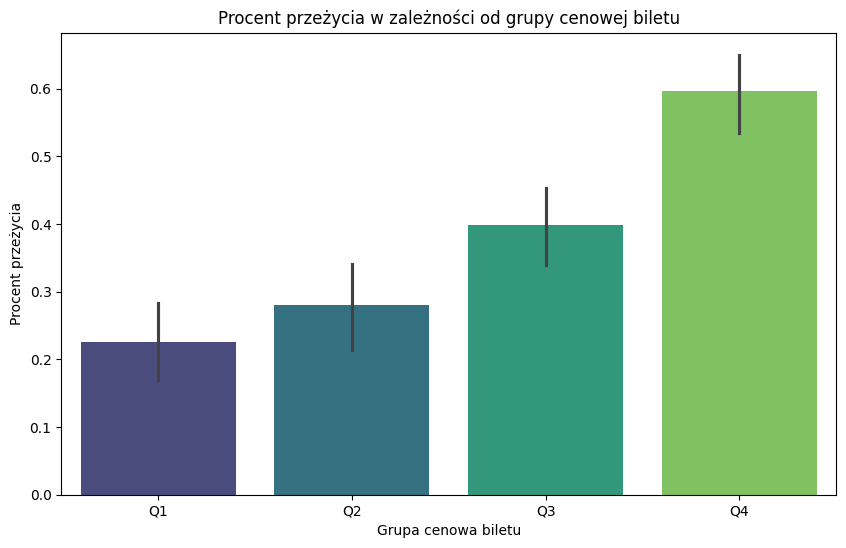

In [84]:
# --- Analiza zależności ceny biletu (Fare) vs przeżycie na uzupełnionych danych ---
print("\n--- Analiza zależności ceny biletu (Fare) vs przeżycie ---")

# Wizualizacja gęstości rozkładu ceny biletu
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_df_filled, x='Fare', hue='Survived', fill=True, palette='Set2')
plt.title('Gęstość rozkładu ceny biletu w zależności od przeżycia (po uzupełnieniu braków)')
plt.xlabel('Cena biletu')
plt.ylabel('Gęstość')
plt.xlim(0, 300) # Ograniczenie osi x dla lepszej czytelności ze względu na wartości odstające
plt.show()

# Podział ceny biletu na grupy i analiza przeżycia
# Użyjemy kwartyli do podziału na grupy, aby uwzględnić rozkład danych
fare_bins = titanic_df_filled['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
# Dodajemy 0.01 do górnej granicy, aby uwzględnić wartości równe kwartylowi
fare_bins[-1] += 0.01
fare_labels = ['Q1', 'Q2', 'Q3', 'Q4']
titanic_df_filled['Fare_Group'] = pd.cut(titanic_df_filled['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True, right=False)


print("\nProcentowy rozkład przeżycia według grup cenowych biletu:")
print(titanic_df_filled.groupby('Fare_Group', observed=False)['Survived'].mean() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(x='Fare_Group', y='Survived', data=titanic_df_filled, hue='Fare_Group', palette='viridis', legend=False)
plt.title("Procent przeżycia w zależności od grupy cenowej biletu")
plt.xlabel("Grupa cenowa biletu")
plt.ylabel("Procent przeżycia")
plt.show()

## Porównanie analizy ceny biletu przed i po uzupełnieniu brakujących wartości

--- Porównanie rozkładu ceny biletu przed i po uzupełnieniu braków ---


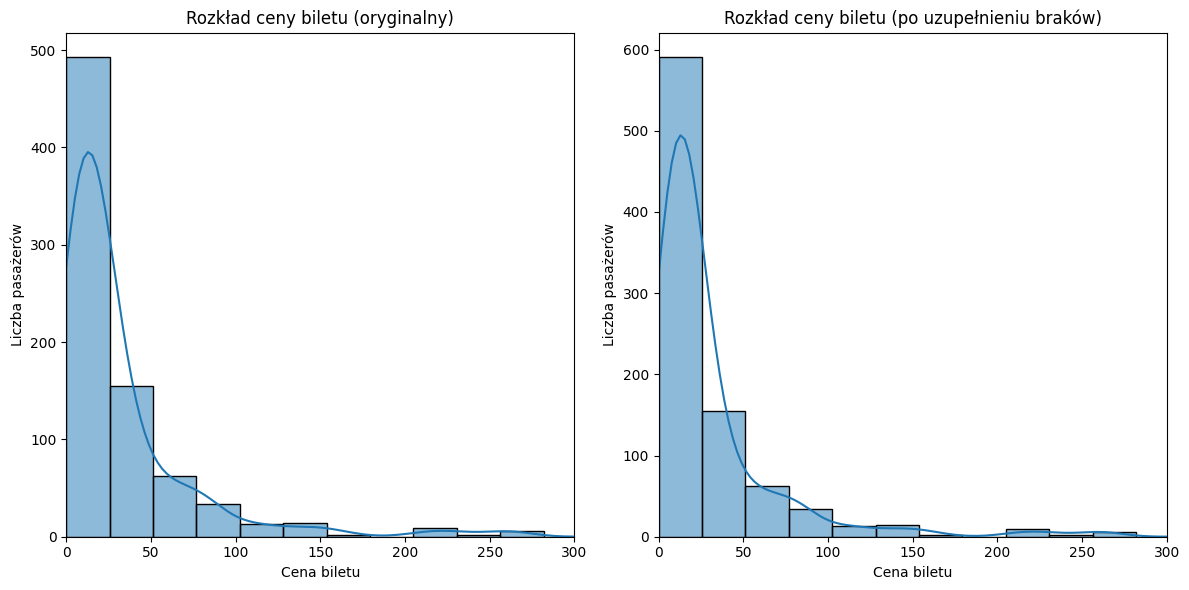


--- Porównanie procentowego rozkładu przeżycia według grup cenowych biletu ---

Procentowy rozkład przeżycia według grup cenowych biletu (oryginalny):
Fare_Group
Q1    20.408163
Q2    29.797980
Q3    44.162437
Q4    60.396040
Name: Survived, dtype: float64

Procentowy rozkład przeżycia według grup cenowych biletu (po uzupełnieniu braków):
Fare_Group
Q1    22.641509
Q2    28.021978
Q3    39.852399
Q4    59.734513
Name: Survived, dtype: float64


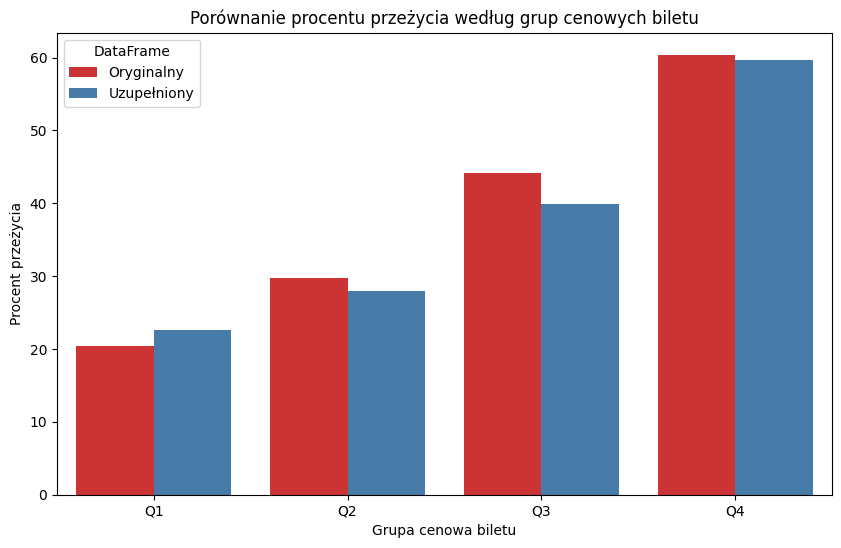

In [86]:
# --- Porównanie rozkładu ceny biletu przed i po uzupełnieniu braków ---
print("--- Porównanie rozkładu ceny biletu przed i po uzupełnieniu braków ---")

plt.figure(figsize=(12, 6))

# Rozkład ceny biletu w oryginalnym DataFrame
plt.subplot(1, 2, 1)
sns.histplot(data=titanic_df, x='Fare', bins=20, kde=True)
plt.title('Rozkład ceny biletu (oryginalny)')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.xlim(0, 300)

# Rozkład ceny biletu w DataFrame z uzupełnionymi brakami
plt.subplot(1, 2, 2)
sns.histplot(data=titanic_df_filled, x='Fare', bins=20, kde=True)
plt.title('Rozkład ceny biletu (po uzupełnieniu braków)')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.xlim(0, 300)


plt.tight_layout()
plt.show()

# --- Porównanie procentowego rozkładu przeżycia według grup cenowych biletu ---
print("\n--- Porównanie procentowego rozkładu przeżycia według grup cenowych biletu ---")

# Podział ceny biletu na grupy i analiza przeżycia dla oryginalnego DataFrame
fare_bins_original = titanic_df['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
fare_bins_original[-1] += 0.01
fare_labels = ['Q1', 'Q2', 'Q3', 'Q4']
titanic_df['Fare_Group'] = pd.cut(titanic_df['Fare'], bins=fare_bins_original, labels=fare_labels, include_lowest=True, right=False)
survival_rate_original_fare = titanic_df.groupby('Fare_Group', observed=False)['Survived'].mean() * 100
print("\nProcentowy rozkład przeżycia według grup cenowych biletu (oryginalny):")
print(survival_rate_original_fare)

# Podział ceny biletu na grupy i analiza przeżycia dla DataFrame z uzupełnionymi brakami
fare_bins_filled = titanic_df_filled['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
fare_bins_filled[-1] += 0.01
titanic_df_filled['Fare_Group'] = pd.cut(titanic_df_filled['Fare'], bins=fare_bins_filled, labels=fare_labels, include_lowest=True, right=False)
survival_rate_filled_fare = titanic_df_filled.groupby('Fare_Group', observed=False)['Survived'].mean() * 100
print("\nProcentowy rozkład przeżycia według grup cenowych biletu (po uzupełnieniu braków):")
print(survival_rate_filled_fare)

# Wizualizacja porównania procentu przeżycia
survival_comparison_fare = pd.DataFrame({
    'Oryginalny': survival_rate_original_fare,
    'Uzupełniony': survival_rate_filled_fare
}).reset_index()

plt.figure(figsize=(10, 6))
melted_comparison_fare = survival_comparison_fare.melt('Fare_Group', var_name='DataFrame', value_name='Procent przeżycia')
sns.barplot(x='Fare_Group', y='Procent przeżycia', hue='DataFrame', data=melted_comparison_fare, palette='Set1')
plt.title("Porównanie procentu przeżycia według grup cenowych biletu")
plt.xlabel("Grupa cenowa biletu")
plt.ylabel("Procent przeżycia")
plt.show()

Cabin vs Survived

Analiza tego przypadku nie ma sensu, ponieważ 70+% rekordów z kolumny Cabin jest puste

## Analiza korelacji

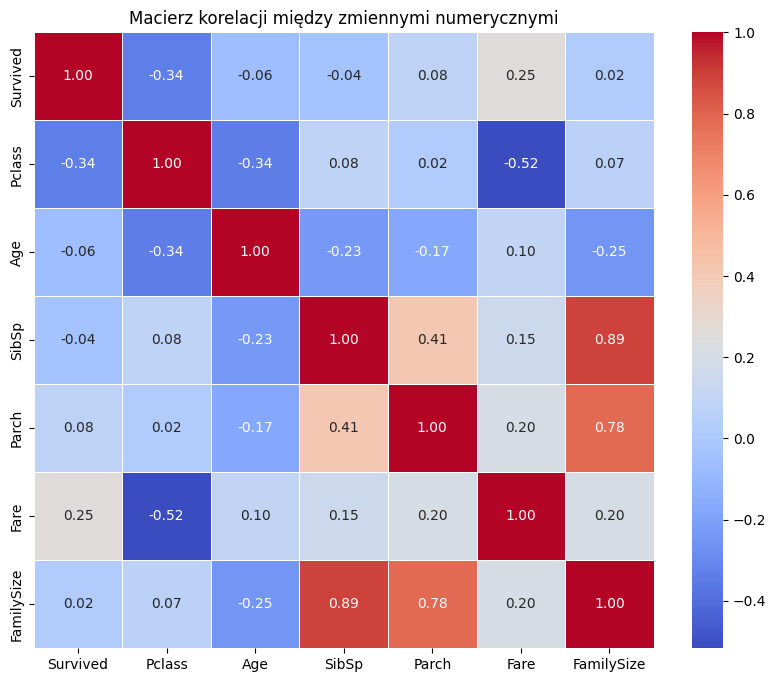

In [89]:
numerical_cols = titanic_df_filled.select_dtypes(include=np.number).columns

# Obliczenie macierzy korelacji
correlation_matrix = titanic_df_filled[numerical_cols].corr()

# Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji między zmiennymi numerycznymi')
plt.show()



*   Pclass i Survived: Istnieje umiarkowana ujemna korelacja (-0.34) między klasą biletu (Pclass) a przeżyciem (Survived). Oznacza to, że pasażerowie podróżujący w niższych klasach (wyższa wartość Pclass) mieli mniejsze szanse na przeżycie, co potwierdza nasze wcześniejsze obserwacje.
*   Fare i Survived: Widać pozytywną korelację (0.25) między ceną biletu (Fare) a przeżyciem (Survived). Pasażerowie, którzy zapłacili więcej za bilet, mieli większe szanse na przeżycie. Ta korelacja jest powiązana z korelacją między Pclass i Fare, ponieważ droższe bilety były zazwyczaj w wyższych klasach.


*   FamilySize i Survived: Korelacja między rozmiarem rodziny (FamilySize) a przeżyciem (Survived) jest bardzo niska (0.02). Pomimo wcześniejszych obserwacji, że małe grupy rodzinne miały większe szanse na przeżycie, korelacja liniowa dla tej zmiennej nie jest silna.
*   Age i Survived: Korelacja między wiekiem (Age) a przeżyciem (Survived) jest również bardzo niska i bliska zeru (-0.06). Chociaż wcześniejsza analiza grup wiekowych wykazała, że dzieci miały większe szanse na przeżycie, a osoby starsze mniejsze, korelacja liniowa dla całej zmiennej 'Age' nie jest silna. Może to sugerować, że związek między wiekiem a przeżyciem nie jest czysto liniowy.





## Wnioski końcowe

Na podstawie przeprowadzonej analizy danych dotyczących pasażerów Titanica, można wyciągnąć następujące kluczowe wnioski dotyczące czynników, które miały największy wpływ na przeżycie:

1. **Płeć:** Płeć była najsilniejszym predyktorem przeżycia. Kobiety miały znacznie wyższe szanse na przeżycie niż mężczyźni, co wskazuje na priorytetowe traktowanie kobiet podczas ewakuacji ("kobiety i dzieci najpierw").

2. **Klasa biletu (Pclass):** Klasa podróży miała znaczący wpływ na przeżycie. Pasażerowie podróżujący w 1. klasie mieli znacznie wyższy odsetek przeżycia w porównaniu do pasażerów z 2. i 3. klasy. Może to być związane z lokalizacją kabin bliżej szalup ratunkowych lub ogólnym priorytetem w dostępie do nich.

3. **Wiek:** Wiek również miał wpływ na przeżycie. Dzieci (0-15 lat) miały relatywnie wysokie szanse na przeżycie, podczas gdy osoby starsze (powyżej 60 lat) miały najniższe.

4. **Liczba członków rodziny (FamilySize):** Osoby podróżujące w małych grupach rodzinnych (2-4 osoby) miały wyższe szanse na przeżycie niż osoby podróżujące samotnie lub w bardzo dużych rodzinach. Sugeruje to, że podróżowanie z kilkoma bliskimi mogło ułatwić wzajemną pomoc i ewakuację.

5. **Cena biletu (Fare):** Cena biletu była silnie skorelowana z klasą biletu i również miała wpływ na przeżycie. Pasażerowie, którzy zapłacili wyższą cenę za bilet (czyli najczęściej podróżujący w wyższych klasach), mieli większe szanse na przeżycie.

6. **Port zaokrętowania (Embarked):** Port zaokrętowania wykazał pewne różnice w odsetku przeżycia, co może być pośrednio związane z rozkładem klas podróży pasażerów wsiadających w poszczególnych portach.

7. **Numer kabiny (Cabin):** Kolumna 'Cabin' miała bardzo dużą liczbę brakujących wartości, co utrudnia bezpośrednią analizę jej wpływu na przeżycie. Jednak fakt, że pasażerowie z wyższych klas mieli częściej przypisane numery kabin, sugeruje pośredni związek poprzez korelację z Pclass i Fare.

**Podsumowując:** Najważniejszymi czynnikami wpływającymi na przeżycie w katastrofie Titanica były płeć, klasa biletu (lub cena biletu jako jej wskaźnik) oraz wiek (szczególnie bycie dzieckiem). Liczba członków rodziny również miała znaczenie, sprzyjając przeżyciu w małych grupach. Te wnioski są zgodne z historycznymi relacjami z katastrofy i podkreślają nierówności w szansach na ratunek w zależności od statusu społecznego i demografii pasażerów.